# Double pendulum with torsion damper
Let us consider the double pendulum depicted in the figure below. A mass is located at each end of the massless rods concentrated at $\mathcal{P}$ and $\mathcal{Q}$. The massless rods are of length $l$ and the gravity is acting in $-\mathbf{\hat{n}}_{y}$. A torsional spring acts between the first and the second pendulum at point $\mathcal{P}$ with a stiffness of $\sigma$ and a viscous damping $\delta$.

<div>
<img src="d_pend1.png" width="300"/>
</div>

Recall Kane's equations:
$$f_{r}^* = f_{r}$$

$$\sum_{j=1}^{N} \left[ \dot{\mathbf{p}}^{B_j} \cdot \mathbf{v}_{r}^{B_j} ~+ \dot{\mathbf{L}}^{B_j} \cdot \boldsymbol{\omega}_{r}^{B_j}\right] = \sum_{j=1}^{N} \left[ \mathbf{F}^{B_j} ~ \cdot \mathbf{v}_{r}^{B_j} ~ + \mathbf{T}^{B_j} \cdot \boldsymbol{\omega}^{B_j}_r \right]$$

Let's set-up the reference frames and parameters corresponding to the figure in SymPy mechanics:

In [1]:
import sympy as sp
import sympy.physics.mechanics as me
me.init_vprinting()

q1, q2 = me.dynamicsymbols('q1, q2') # Generalized coordinates as function of time
qd1, qd2 = me.dynamicsymbols('q1, q2', level=1) # Time-derivative of generalized coordinates
u1, u2 = me.dynamicsymbols('u1, u2') # Generalized speeds (function of time)

l, m, g = sp.symbols('l, m, g') # Constants
sig, delta = sp.symbols('sigma, delta') # Force parameters

Orient the reference frames:

In [2]:
N = me.ReferenceFrame('N') # Inertial frame
A = N.orientnew('A', 'Axis', (q1, N.z)) # Rod A frame
B = A.orientnew('B', 'Axis', (q2, N.z)) # Rod B frame

## Kinematics
Rotational motion:
$$\boldsymbol{\omega}^{A} = \dot{q}_1 \mathbf{\hat{n}_z}, \qquad         \boldsymbol{\omega}^{B} = (\dot{q}_1 + \dot{q}_2) \mathbf{\hat{n}_{z}}$$

In [3]:
A.ang_vel_in(N).express(N)

In [4]:
B.ang_vel_in(N).express(N)

### Choose generalized speeds as:
$$u_1 = \dot{q}_1, \qquad  u_2 = \dot{q}_1 + \dot{q}_2$$
so
$$\boldsymbol{\omega}^{A} = u_1 \mathbf{\hat{n}_z}, \qquad         \boldsymbol{\omega}^{B} = u_2 \mathbf{\hat{n}_{z}}$$.

In [5]:
kde = [u1 - qd1, u2 - (qd1 + qd2)] # Kinematical differential equation

### Differentiation of vector:
$$\frac{^{N}d \mathbf{r}}{d t} =  \frac{^{A}d \mathbf{r}}{d t} + ^{N}\omega^{A} \times \mathbf{r} $$

or by the two-point formula
$$^{N}\mathbf{v}^{\mathcal{P}} =  ^{A}\mathbf{v}^{\mathcal{O}} + ^{N}\boldsymbol{\omega}^{A} \times \mathbf{r}_{\mathcal{OP}}.$$

### Calculate the velocities of $\mathcal{P}$ and $\mathcal{Q}$:
Position vectors:

$$\mathbf{r}^{\mathcal{OP}} = - l \mathbf{\hat{a}_y}$$

$$\mathbf{r}^{\mathcal{OQ}} = - l \mathbf{\hat{a}_y} - l \mathbf{\hat{b}_y}$$

Velocities:

$$\mathbf{v}^{\mathcal{P}} = l u_1\mathbf{\hat{a}_x}$$

$$\mathbf{v}^{\mathcal{Q}} = l u_1\mathbf{\hat{a}_x} + l u_2\mathbf{\hat{b}_x}$$

In Sympy Mechanics:

In [6]:
O = me.Point('O') # Origo
O.set_vel(N, 0)

P = O.locatenew('P', ( -l * A.y )) # Point @ end of rod A
Ap = me.Particle('Ap', P, m) # Define mass
P.v2pt_theory(O, N, A) # Set velocity

In [7]:
Q = P.locatenew('Q', ( -l * B.y)) # Point @ end of rod B
Bp = me.Particle('Bp', Q, m)
Q.v2pt_theory(P, N, B) # Set velocity

Accelerations are needed in Kane's method:

$$\mathbf{a}^{\mathcal{P}} = l \dot{u}_{1}\mathbf{\hat{a}_x} +  l u_{1}^{2}\mathbf{\hat{a}_y}$$

$$\mathbf{a}^{\mathcal{Q}} = l \dot{u}_{1}\mathbf{\hat{a}_x} + l u_{1}^{2}\mathbf{\hat{a}_y} + l \dot{u}_{2}\mathbf{\hat{b}_x} + l u_{2}^{2}\mathbf{\hat{b}_y}$$

In [8]:
P.acc(N)

In [9]:
Q.acc(N)

## Inertial forces
Let us calculate the inertial forces before applying forces. 
$$f^*_r= \sum_{j=1}^{N} \left[ \dot{\mathbf{p}}^{B_j} \cdot \mathbf{v}_{r}^{B_j} ~+ \dot{\mathbf{L}}^{B_j} \cdot \boldsymbol{\omega}_{r}^{B_j}\right]$$
We have
$$\mathbf{v}^{\mathcal{P}} = l u_1\mathbf{\hat{a}_x}, \qquad \mathbf{v}^{\mathcal{Q}} = l u_1\mathbf{\hat{a}_x} + l u_2\mathbf{\hat{b}_x}$$

### Partial velocities become
$$\mathbf{v}^{\mathcal{P}}_1 = \frac{\partial{} \mathbf{v}^{\mathcal{P}}}{\partial u_1} = l \mathbf{\hat{a}_x}, \qquad
\mathbf{v}^{\mathcal{Q}}_1 = \frac{\partial{} \mathbf{v}^{\mathcal{Q}}}{\partial u_1} = l \mathbf{\hat{a}_x},
$$

$$\mathbf{v}^{\mathcal{P}}_2 = \frac{\partial{} \mathbf{v}^{\mathcal{P}}}{\partial u_2} = \mathbf{0}, \qquad
\mathbf{v}^{\mathcal{Q}}_2 = \frac{\partial{} \mathbf{v}^{\mathcal{Q}}}{\partial u_2} = l \mathbf{\hat{b}_x}
$$

### Time derivative of momentum
$$\mathbf{\dot{p}}^{\mathcal{P}} = m \left(l \dot{u}_{1}\mathbf{\hat{a}_x} + l u_{1}^{2}\mathbf{\hat{a}_y} \right), \quad \mathbf{\dot{p}}^{\mathcal{Q}} = m \left(l \dot{u}_{1}\mathbf{\hat{a}_x} + l u_{1}^{2}\mathbf{\hat{a}_y} + l \dot{u}_{2}\mathbf{\hat{b}_x} + l u_{2}^{2}\mathbf{\hat{b}_y}\right)$$


### Evaluate the sum
$$f^*_1 = m \left(l \dot{u}_{1}\mathbf{\hat{a}_x} + l u_{1}^{2}\mathbf{\hat{a}_y} \right) \cdot l \mathbf{\hat{a}_x} + m \left(l \dot{u}_{1}\mathbf{\hat{a}_x} + l u_{1}^{2}\mathbf{\hat{a}_y} + l \dot{u}_{2}\mathbf{\hat{b}_x} + l u_{2}^{2}\mathbf{\hat{b}_y}\right)\cdot l \mathbf{\hat{a}_x} = 2 m l^{2} \dot{u}_{1} +  m  l^{2}\dot{u}_{2} \operatorname{cos}\left(q_{2}\right)- m l^{2}  u^{2}_{2} \operatorname{sin}\left(q_{2}\right)$$



$$f^*_2 = m \left(l \dot{u}_{1}\mathbf{\hat{a}_x} + l u_{1}^{2}\mathbf{\hat{a}_y} \right) \cdot \mathbf{0} + m \left(l \dot{u}_{1}\mathbf{\hat{a}_x} + l u_{1}^{2}\mathbf{\hat{a}_y} + l \dot{u}_{2}\mathbf{\hat{b}_x} + l u_{2}^{2}\mathbf{\hat{b}_y}\right)\cdot l \mathbf{\hat{b}_x} = m  l^{2}\dot{u}_{1} \operatorname{cos}\left(q_{2}\right) + m l^{2}  u^{2}_{1} \operatorname{sin}\left(q_{2}\right) + m l^{2}  \dot{u}_{2}$$

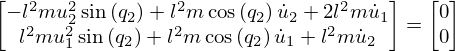

In [10]:
KM = me.KanesMethod(N, [q1, q2], [u1, u2], kd_eqs=kde)
fr, fstar = KM.kanes_equations([Ap, Bp], None)
sp.Eq(-fstar,fr)

## Forces
$$ f_{r} =\sum_{j=1}^{N} \left[ \mathbf{F}^{B_j} ~ \cdot \mathbf{v}_{r}^{B_j} ~ + \mathbf{T}^{B_j} \cdot \boldsymbol{\omega}^{B_j}_r \right]$$

Recall
$$\boldsymbol{\omega}^{A} = u_1 \mathbf{\hat{n}_z}, \qquad         \boldsymbol{\omega}^{B} = u_2 \mathbf{\hat{n}_{z}}$$


### Partial angular velocities
$$\boldsymbol{\omega}^{A}_1 = \mathbf{\hat{n}_z}, \quad \boldsymbol{\omega}^{B}_1 = \mathbf{0},$$

$$\boldsymbol{\omega}^{A}_2 = \mathbf{0}, \quad \boldsymbol{\omega}^{B}_2 = \mathbf{\hat{n}_z}.$$

<div>
<img src="d_pend1.png" width="300"/>
</div>

### Torques

$$\mathbf{T}^{A} = \left(\sigma q_2 + \delta \dot{q}_2 \right) \mathbf{\hat{n}_z} = \left(\sigma q_2 + \delta \left(u_2 -u_1\right) \right) \mathbf{\hat{n}_z} $$

$$\mathbf{T}^{B} = -\mathbf{T}^{A} $$

### Gravity
$$\mathbf{F}^{\mathcal{P}} = - g m \mathbf{\hat{n}_y}$$
$$\mathbf{F}^{\mathcal{Q}} = - g m \mathbf{\hat{n}_y}$$



### Evaluate the sum
Torques
$$ f_{1}^T = \mathbf{T}^{A} \cdot \mathbf{\hat{n}_z} + \mathbf{T}^{B} \cdot \mathbf{0} =  \sigma q_2 + \delta \left(u_2 -u_1\right) $$

$$ f_{2}^T = \mathbf{T}^{A} \cdot \mathbf{0} + \mathbf{T}^{B} \cdot \mathbf{\hat{n}_z} = -\sigma q_2 - \delta \left(u_2 -u_1\right) $$

Gravity
$$ f_{1}^F = - g m \mathbf{\hat{n}_y} \cdot l \mathbf{\hat{a}_x} - g m \mathbf{\hat{n}_y}\cdot l \mathbf{\hat{a}_x} = - 2 g l m \operatorname{sin}\left(q_{1}\right)$$

$$ f_{2}^F = - g m \mathbf{\hat{n}_y} \cdot \mathbf{0} - g m \mathbf{\hat{n}_y}\cdot l \mathbf{\hat{b}_x} = - g l m \operatorname{sin}\left(q_{1} + q_{2}\right) $$


In [16]:
# Torque
Ta = (sig * q2 + delta * qd2) * N.z

# Gravity force
Fg = -g*m*N.y*0

# Apply forces on frames and points
forces = [(A, Ta), (B, -Ta), (P, Fg), (Q, Fg)]

### Generate EOM

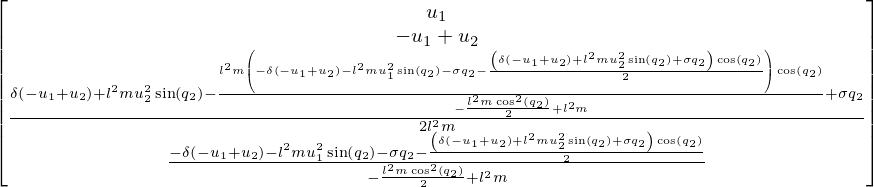

In [19]:
KM = me.KanesMethod(N, [q1, q2], [u1, u2], kd_eqs=kde) # Kane's method instance

fr, fstar = KM.kanes_equations([Ap, Bp], forces) # "Evaluate the sum"

sp.Eq(-fstar,fr) # Output EOM
KM.rhs()

## Different generalized speeds

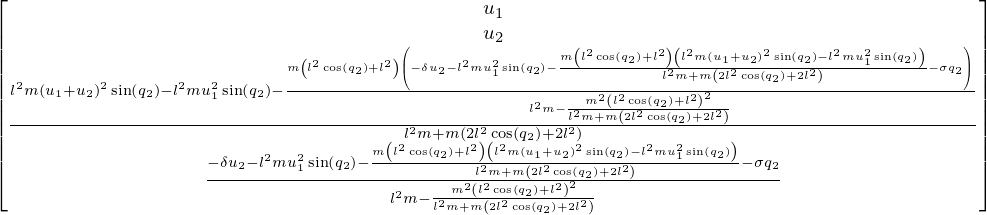

In [20]:
# Test different kde.
kde1 = [u1 - qd1, u2 - qd2] # Equivalent to Lagrange

KM = me.KanesMethod(N, [q1, q2], [u1, u2], kd_eqs=kde1)
fr, fstar = KM.kanes_equations([Ap, Bp], forces)
sp.Eq(-fstar,fr)
KM.rhs()